### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
#10 counts just to get better idea of the data with more rows
data.head(10)

#would prefer sample method, it helps in getting wholistic view of data to certain extent
data.sample(10)
#To print the information about DataFrame (index dtype, columns, non-null values)
#data.info(verbose=True)   #I the output we see the data type 


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
10668,No Urgent Place,Alone,Sunny,80,10PM,Restaurant(<20),1d,Female,26,Married partner,...,never,1~3,less1,never,1,0,0,0,1,0
4092,No Urgent Place,Partner,Sunny,80,10AM,Restaurant(20-50),2h,Male,21,Unmarried partner,...,less1,4~8,1~3,less1,1,0,0,0,1,0
10366,No Urgent Place,Partner,Sunny,55,2PM,Bar,1d,Female,26,Unmarried partner,...,less1,1~3,4~8,1~3,1,0,0,0,1,0
12589,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,21,Single,...,never,1~3,1~3,less1,1,0,0,1,0,0
1023,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,50plus,Divorced,...,4~8,4~8,4~8,less1,1,1,0,0,1,1
3162,Work,Alone,Sunny,55,7AM,Restaurant(<20),1d,Male,41,Married partner,...,1~3,1~3,4~8,less1,1,0,0,0,1,1
12420,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant(<20),1d,Male,31,Married partner,...,less1,4~8,1~3,4~8,1,0,0,0,1,0
9596,Work,Alone,Rainy,55,7AM,Bar,1d,Female,31,Unmarried partner,...,1~3,4~8,1~3,1~3,1,1,1,0,1,0
10667,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Female,26,Married partner,...,never,1~3,less1,never,1,0,0,0,1,0
12231,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Female,21,Married partner,...,1~3,1~3,1~3,less1,1,0,0,1,0,0


2. Investigate the dataset for missing or problematic data.

In [5]:
#to get basic datatype information
data.info()

#age : typically should be of datatype numeric say int64, but since here there might be a miss in collecting the exact age of some drivers, there seems to be data saying above 50 etc..
#income : should be of datatype int64 or float64 as it is of kind numeric, but since there is range along with dollar signs the datatype object is used
#passanger : column name passanger is missspelled, it should be passenger

#the correlation between the nemeric columns in the dataset
display(data.corr(method='pearson', numeric_only=True))

#to get descriptive statistics of a DataFrame or Series
#data.describe()  

#find missing values per column
data_missing_values = data.isnull().sum()
display("Missing values: " , data_missing_values)

#Missing data: With approximately 99% of the values for 'car' being blank it isn't really adding much value to the dataset. The other columns missing values are missing so few values (i.e. less than 2%) that I am assuming this will not have a significant impact overall

#find for duplicate rows
data_duplicates = data.duplicated().sum()
print("Duplicate rows: ", data_duplicates)

#Duplicates: There are 74 duplicate rows. This is survey, and it is quite possible that there will be duplicates. We will keep the duplicates as we are interested in every response

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.019716,NaN,-0.155332,-0.216254,0.097085,-0.097085,0.061240
has_children,-0.019716,1.000000,NaN,0.078211,-0.013722,-0.031620,0.031620,-0.045557
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.155332,0.078211,NaN,1.000000,0.324984,-0.303533,0.303533,-0.081602
toCoupon_GEQ25min,-0.216254,-0.013722,NaN,0.324984,1.000000,-0.192319,0.192319,-0.103633
direction_same,0.097085,-0.031620,NaN,-0.303533,-0.192319,1.000000,-1.000000,0.014570
direction_opp,-0.097085,0.031620,NaN,0.303533,0.192319,-1.000000,1.000000,-0.014570
Y,0.061240,-0.045557,NaN,-0.081602,-0.103633,0.014570,-0.014570,1.000000


'Missing values: '

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Duplicate rows:  74


<Axes: >

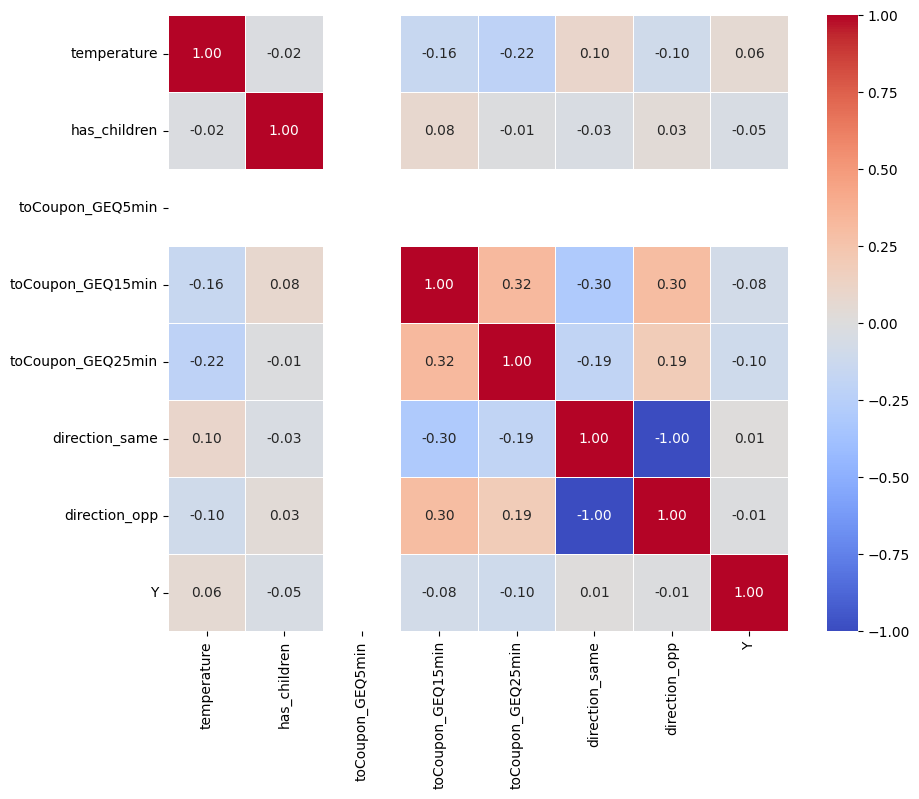

In [10]:
#Create the heatmap using Seaborn
# Adjust figure size as needed
plot_data = data.corr(method='pearson', numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(plot_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

3. Decide what to do about your missing data -- drop, replace, other...

In [276]:
# Drop the car column
print("Before dropping Car column", data.shape)
# Check if 'car' column exists before dropping
if 'car' in data.columns:
    data = data.drop(columns=["car"])
else:
    print("Column 'car' not found. Available columns:", data.columns)

print("After dropping Car column", data.shape)

Before dropping Car column (12684, 25)
Column 'car' not found. Available columns: Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')
(12684, 25)


4. What proportion of the total observations chose to accept the coupon?



In [287]:
# Evaluate value_counts on 'Y' column
print("Total observations chose to accept the coupon count are : ", data["Y"].value_counts().values[0])

#just to check what is the retrurn type
print(type(data["Y"].value_counts()))

# coupons accepted:  7210
# coupons total:  12684
proportion_acceptance = ((data["Y"].value_counts().values[0]/data["Y"].value_counts().sum())*100).round(2)
print("Total observations chose to accept the coupon proporation is: ", proportion_acceptance,"%")

#Proportion of the total observations that chose to accept the coupon:  0.5684326710816777

Total observations chose to accept the coupon count are :  7210
<class 'pandas.core.series.Series'>
Total observations chose to accept the coupon proporation is:  56.84 %


5. Use a bar plot to visualize the `coupon` column.

/tmp/ipykernel_121/4110278427.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coupon_counts.index, y=coupon_counts.values, palette="viridis")


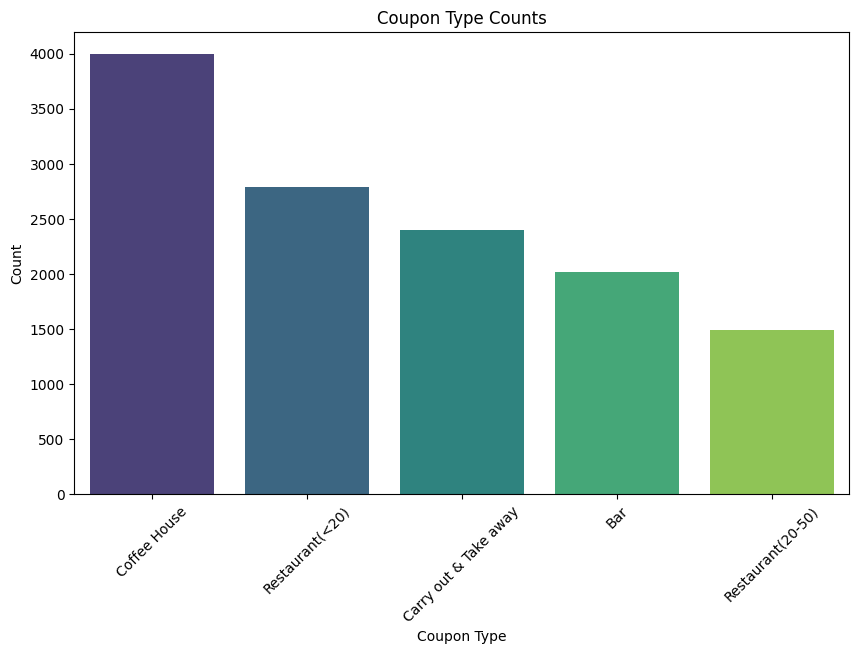

In [20]:
coupon_counts = data["coupon"].value_counts()

plt.figure(figsize=(10,6)) 
#take the count of each coupon value so the counts can be used for Y and X can be the coupon values.
sns.barplot(x=coupon_counts.index, y=coupon_counts.values, palette="viridis")
plt.title("Coupon Type Counts")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.xticks(rotation=45)  
plt.show()

#Based on the chart, even though most coupons are sent for CoffeeHouse, their acceptance rate is lower compared to other types of coupons.
#Bar coupons are sent less often, but they also have a relatively low acceptance rate.
#In contrast, RestaurantLessThan20 and CarryAway coupons show a higher acceptance rate than the others.

6. Use a histogram to visualize the temperature column.

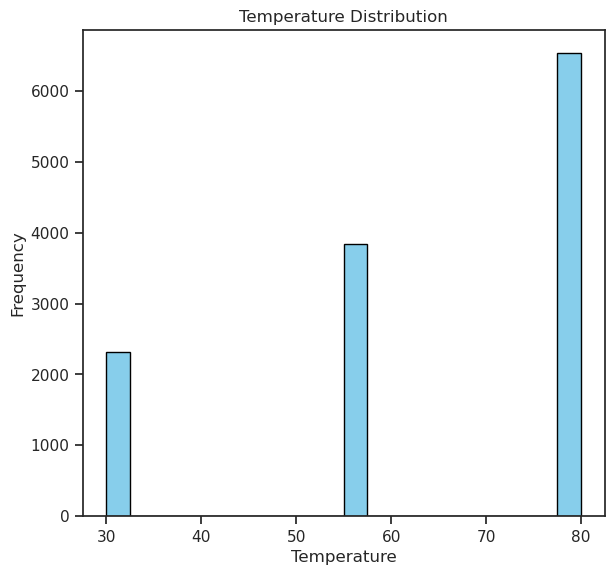

In [302]:
#using plotly to plot the histogram of the temperature column
plt.figure(figsize=(6,6))
plt.hist(data['temperature'], bins=20, color='skyblue', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [36]:
data_bar = data[data["coupon"] == "Bar"]
data_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,NaN,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,NaN,never,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
Overall proportion of the coupon acceptance is :  41.0


maritalStatus
Divorced              0.89
Married partner      14.38
Single               17.90
Unmarried partner     7.49
Widowed               0.35
Name: Y, dtype: float64

<Axes: xlabel='maritalStatus'>

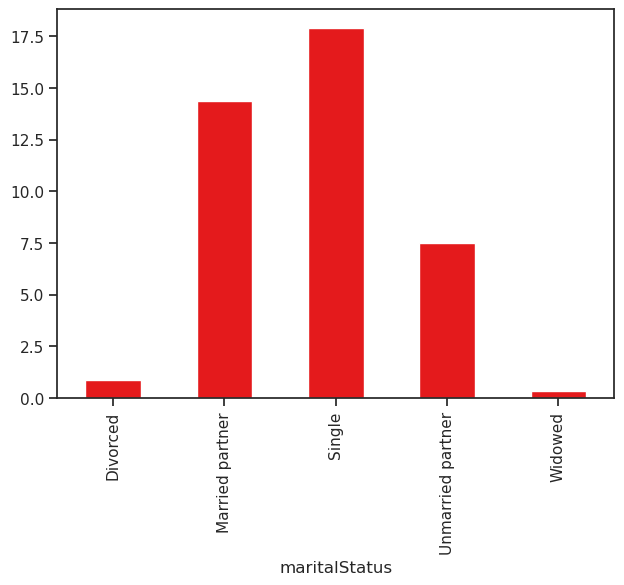

In [99]:
print(data_bar["maritalStatus"].unique())
#find the total number of accepted coupons for Bar dataframe
coupon_accept = data_bar[data_bar["Y"] == 1]["Y"].value_counts().values[0]

#find the overall total of Y column (accept and reject)
total_accpt_rej = data_bar["Y"].value_counts().sum()

#to find the acceptance ratio
acceptance_ratio = (coupon_accept/total_accpt_rej * 100).round(2)
print("Overall proportion of the coupon acceptance is : " , acceptance_ratio)

#the acceptance ratio is 41% for the bar coupons

#Just to evaluate what marital status people are more interested in Bar coupons (to decide target audiance)
#single and married partner folks are likely to accept the coupons
accpt_data = data_bar[data_bar["Y"] == 1]
accpt_data_perent =(accpt_data.groupby("maritalStatus")["Y"].sum()/data_bar["Y"].value_counts().sum()*100).round(2)
display(accpt_data_perent)
accpt_data_perent.plot(kind="bar")


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [216]:
#unique values of Bar column
print(data_bar['Bar'].unique())

#to avoid any loss of original dataset using copy() method
data_bar_copy = data_bar.copy()

#find the mean of both the case, fewer or 3 times a month And more than 3 times a month
#This filtering does not cosider any null/NaN values of Bar column
data_bar_3_or_less = (data_bar_copy[data_bar_copy['Bar'].isin(['never', 'less1', '1~3'])]["Y"].mean() * 100).round(2)
data_bar_more_than_3 = (data_bar_copy[data_bar_copy['Bar'].isin(['4~8', 'gt8'])]["Y"].mean()*100).round(2)

print("Drivers acceptance rate who visit the Bar 3 or lesser times is : ", data_bar_3_or_less, "%")
print("Drivers acceptance rate who visit the Bar more than 3 times is : " , data_bar_more_than_3, "%")

#the acceptance rate between the above two scnearios is as below
#the bar coupon was accepted approximately 37% of the time by people who went to the bar 3 or fewer times a month
#the bar coupon was accepted approximately 76% of the time by people who went to the bar more than 3 times a month

['never' 'less1' '1~3' 'gt8' nan '4~8']
Drivers acceptance rate who visit the Bar 3 or lesser times is :  37.06 %
Drivers acceptance rate who visit the Bar more than 3 times is :  76.88 %


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [247]:
#since the age column is object datatype and has singular values and also age group
#and the age group below 25 is jsut two values, will use ~ with isin method to find all drivers
#above age group 25 and have been to Bar more than once a month

# Need to handle 'below21' and '50plus' values in the 'age' column - set 'below21' = 20 and '50plus' = 51
# Add new column 'age_num' with numeric values for age
data["age_num"] = data["age"].replace({'below21': 20, '50plus': 51}).astype(int)

# Refresh bar coupon slice to incorporate age_numeric column
data_bar_coupon = data[data["coupon"] == "Bar"]

# Filter the dataset for drivers who go to a bar more than once a month and are over the age of 25 and calculate acceptance rate
data_target_group = (data_bar_coupon[(data_bar_coupon["Bar"].isin(['1~3', '4~8', 'gt8'])) & (data_bar_coupon["age_num"] > 25)]["Y"].mean()*100).round(2)

# Filter the dataset for all others and calculate acceptance rate
data_other_group = (data_bar_coupon[~((data_bar_coupon["Bar"].isin(['1~3', '4~8', 'gt8'])) & (data_bar_coupon["age_num"] > 25))]["Y"].mean()*100).round(2)

print("Acceptance Rate for drivers who go to a bar more than once a month and are over the age of 25 is  : ", data_target_group, "%")
print("Acceptance Rate for all others is :", data_other_group, "%")

Acceptance Rate for drivers who go to a bar more than once a month and are over the age of 25 is  :  69.52 %
Acceptance Rate for all others is : 33.5 %


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [245]:
#based on given condition filtering the data
data_filtered = data_bar_coupon[(data_bar_coupon["Bar"].isin(['1~3', 'gt8', '4~8'])) & 
                             (data_bar_coupon['passanger'] != 'Kid(s)') & 
                             (~data_bar_coupon['occupation'].isin(['Farming Fishing & Forestry']))]
acceptance_rate_data_filtered = (data_filtered["Y"].mean()*100).round(2)

print("Acceptance Rate for specified group is: " , acceptance_rate_data_filtered, "%")

# Fix: Use the data_filtered DataFrame to get indices, not the mean value
acceptance_rate_others = (data[~data.index.isin(data_filtered.index)]['Y'].mean()*100).round(2)

print('Acceptance Rate for all others is :', acceptance_rate_others, "%")

#The bar coupon was accepted approximately is: ",acceptance_rate_data_filtered ,"% of the time by drivers who go to the bar more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry
#"The bar coupon was accepted approximately is: ",acceptance_rate_others,"% of the time by all other drivers

Acceptance Rate for specified group is:  71.32 %
Acceptance Rate for all others is : 56.19 %


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [251]:
# Filter based on the conditions provided
# Condition 1: Go to bars more than once a month, had passengers that were not a kid, and were not widowed
condition1 = (data_bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data_bar_coupon['passanger'] != 'Kid(s)') & (data_bar_coupon['maritalStatus'] != 'Widowed')
    
# Condition 2: Go to bars more than once a month and are under the age of 30
# We've already handled the conversion of age strings to numeric values by creating and populating 'age_numeric' column on data dataframe
condition2 = (data_bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data_bar_coupon['age_num'] < 30)
    
# Condition 3: Go to cheap restaurants more than 4 times a month and income is less than 50K
condition3 = (data_bar_coupon['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (data_bar_coupon['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
    
# Apply conditions to filter data set
dbc_filtered_c1 = data_bar_coupon[condition1]
dbc_filtered_c2 = data_bar_coupon[condition2]
dbc_filtered_c3 = data_bar_coupon[condition3]

# Calculate acceptance rates"
dbc_c1_acceptance_rates = dbc_filtered_c1['Y'].mean()
dbc_c2_acceptance_rates = dbc_filtered_c2['Y'].mean()
dbc_c3_acceptance_rates = dbc_filtered_c3['Y'].mean()
    
print('Condition 1 - acceptance rate: ',dbc_c1_acceptance_rates)
print('Condition 2 - acceptance rate: ',dbc_c2_acceptance_rates)
print('Condition 3 - acceptance rate: ',dbc_c3_acceptance_rates)

#The bar coupon acceptance rate was approximately 71% for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed.
#The bar coupon acceptance rate was approximately 72% for drivers who go to bars more than once a month and are under the age of 30.
#The bar coupon acceptance rate was approximately 45% for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K

Condition 1 - acceptance rate:  0.7132486388384754
Condition 2 - acceptance rate:  0.7217391304347827
Condition 3 - acceptance rate:  0.45348837209302323


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#High Frequency of Bar Visits:
    #Drivers who frequently visit bars, especially more than 3 times a month, are significantly more likely to accept bar coupons. This suggests a strong correlation between the frequency of bar visits and the likelihood of accepting related coupons, possibly due to a higher value placed on such discounts by regular patrons
#Age Factor:
    #Younger drivers, particularly those under the age of 30, show a higher acceptance rate for bar coupons. This could indicate that younger demographics are more inclined towards social outings like bar visits and are more receptive to discounts associated with such activities
    
#Marital Status and Occupation:
    #Drivers who are not widowed and have occupations outside of farming, fishing, or forestry are more likely to accept bar coupons. This might reflect lifestyle or social patterns where individuals in certain occupations or marital statuses have more social engagements or value leisure activities differently
    
#Economic and Dining Preferences: 
    #Drivers with specific economic and dining preferences, such as those who frequent cheap restaurants and have an income of less than 50K, have distinct acceptance rates. This could suggest that economic factors and personal dining habits influence the perceived value of bar coupons.
    
#General Acceptance Among Other Drivers: 
    #The relatively lower acceptance rate among \"all other drivers\" indicates that there are specific demographic and behavioral traits that significantly influence the likelihood of accepting bar coupons. This group likely includes drivers who do not frequently visit bars or do not fit into the specific demographic profiles outlined above
    
#These hypotheses suggest that demographic factors (such as age and marital status), behavioral patterns (frequency of bar visits), economic status, and personal preferences (dining habits) play crucial roles in determining the likelihood of accepting bar coupons

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [256]:
#Looking at drivers who declined Carry Out & Take Away coupons:
#Filter for instances where Carry Out & Take away coupons were declined
data_declined_carryout = data[(data["coupon"]=="Carry out & Take away") & (data["Y"]==0)]

data_declined_carryout.info()

#Analyze dataset for interesting observations:

<class 'pandas.core.frame.DataFrame'>
Index: 633 entries, 25 to 12673
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           633 non-null    object
 1   passanger             633 non-null    object
 2   weather               633 non-null    object
 3   temperature           633 non-null    int64 
 4   time                  633 non-null    object
 5   coupon                633 non-null    object
 6   expiration            633 non-null    object
 7   gender                633 non-null    object
 8   age                   633 non-null    object
 9   maritalStatus         633 non-null    object
 10  has_children          633 non-null    int64 
 11  education             633 non-null    object
 12  occupation            633 non-null    object
 13  income                633 non-null    object
 14  car                   6 non-null      object
 15  Bar                   622 non-null    obje

In [263]:
# Look at declines by age
decline_by_age = (data_declined_carryout["age_num"].value_counts(normalize=True) * 100).round(2)
print("DeclinebyAge", decline_by_age)

DeclinebyAge   age_num
21    19.91
26    19.91
31    18.33
51    12.32
36     9.95
41     9.32
46     5.37
20     4.90
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Coupon Declines by Age')

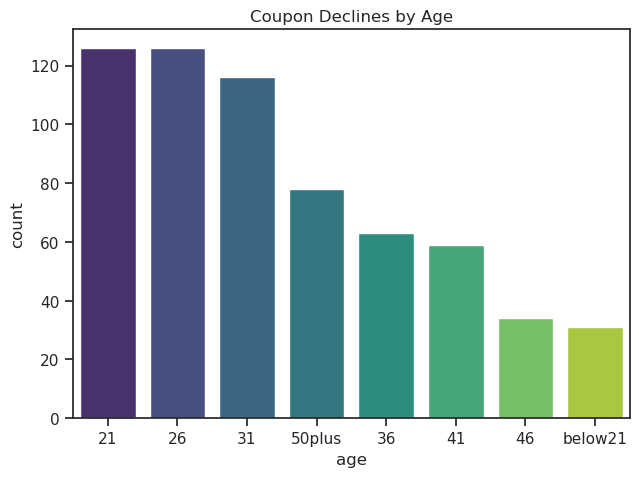

In [264]:
# plot declines by Age
sns.countplot(x="age", data=data_declined_carryout, palette="viridis", order = data_declined_carryout["age"].value_counts().index)
plt.title("Coupon Declines by Age")

In [ ]:
#Looking at the chart, while sending most coupons for CoffeeHouse, the acceptance rate is lower than the other coupons.
#Also, while less coupons are sent for Bar, the acceptance rate is lower than the other coupons as well.
#RestaurantLessThan20 and CarryAway have a higher acceptance rate than the other coupons.